In [0]:
import numpy as np 
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import datasets


In [0]:
# Linear Regression 
X,y = datasets.load_diabetes(return_X_y=True)
lr = LinearRegression()
lr.fit(X,y)
scores = cross_val_score(lr, X, y, cv=5,scoring='neg_mean_squared_error') # cv is number of cross validation folds
print(-scores)
# Get mean score and confidence 
print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))

[2779.92210988 3028.84335258 3237.70099059 3008.69133019 2910.20693327]
MSE: 2993.07 (+/- 301.55)


In [0]:
# closed form solution of Linear Regression

X,y = datasets.load_diabetes(return_X_y=True)
m,n = X.shape
b = np.ones((m,1))
X = np.hstack((X,b))
kf = KFold(n_splits=5)
cv_error = []
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  w = LA.inv(X_train.T @ X_train ) @ X_train.T @ y_train.T
  predicted = np.dot(X_test,w) 
  MSE = np.mean((y_test - predicted)**2)
  cv_error.append(MSE)
print(cv_error)  
# Get mean score and confidence 
print("MSE: %0.2f (+/- %0.2f)" % (np.mean(cv_error), np.std(cv_error) * 2)) 

[2779.922109879192, 3028.843352576558, 3237.7009905881873, 3008.6913301889667, 2910.2069332665196]
MSE: 2993.07 (+/- 301.55)


[1.0e-05 2.0e-05 3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05
 1.0e-04 1.1e-04 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04
 1.9e-04 2.0e-04 2.1e-04 2.2e-04 2.3e-04 2.4e-04 2.5e-04 2.6e-04 2.7e-04
 2.8e-04 2.9e-04 3.0e-04 3.1e-04 3.2e-04 3.3e-04 3.4e-04 3.5e-04 3.6e-04
 3.7e-04 3.8e-04 3.9e-04 4.0e-04 4.1e-04 4.2e-04 4.3e-04 4.4e-04 4.5e-04
 4.6e-04 4.7e-04 4.8e-04 4.9e-04 5.0e-04 5.1e-04 5.2e-04 5.3e-04 5.4e-04
 5.5e-04 5.6e-04 5.7e-04 5.8e-04 5.9e-04 6.0e-04 6.1e-04 6.2e-04 6.3e-04
 6.4e-04 6.5e-04 6.6e-04 6.7e-04 6.8e-04 6.9e-04 7.0e-04 7.1e-04 7.2e-04
 7.3e-04 7.4e-04 7.5e-04 7.6e-04 7.7e-04 7.8e-04 7.9e-04 8.0e-04 8.1e-04
 8.2e-04 8.3e-04 8.4e-04 8.5e-04 8.6e-04 8.7e-04 8.8e-04 8.9e-04 9.0e-04
 9.1e-04 9.2e-04 9.3e-04 9.4e-04 9.5e-04 9.6e-04 9.7e-04 9.8e-04 9.9e-04
 1.0e-03]
[2779.95801971 3028.87371944 3237.5879048  3008.65940943 2910.26582359]
MSE: 2993.07 (+/- 301.45)
[2779.99392532 3028.90405722 3237.47521758 3008.62772936 2910.32461319]
MSE: 2993.07 (+/-

No handles with labels found to put in legend.



MSE: 2993.03 (+/- 293.42)
[2783.03279923 3031.39069097 3229.07917051 3006.61765018 2915.02096103]
MSE: 2993.03 (+/- 293.34)
[2783.06727145 3031.4180761  3228.99461521 3006.60080101 2915.07160242]
MSE: 2993.03 (+/- 293.26)
[2783.10171881 3031.44542461 3228.91032068 3006.58406813 2915.12215769]
MSE: 2993.03 (+/- 293.17)
[2783.13614119 3031.47273649 3228.82628573 3006.56745062 2915.17262701]
MSE: 2993.04 (+/- 293.09)
[2783.17053848 3031.50001172 3228.7425092  3006.55094753 2915.22301055]
MSE: 2993.04 (+/- 293.01)
[2783.20491055 3031.52725028 3228.65898991 3006.53455794 2915.27330849]
MSE: 2993.04 (+/- 292.93)
[2783.2392573  3031.55445214 3228.5757267  3006.51828095 2915.32352099]
MSE: 2993.04 (+/- 292.85)
[2783.27357859 3031.58161729 3228.49271843 3006.50211563 2915.37364825]
MSE: 2993.04 (+/- 292.76)
[2783.30787433 3031.60874571 3228.40996394 3006.48606109 2915.42369042]
MSE: 2993.05 (+/- 292.68)
[2783.34214439 3031.63583738 3228.3274621  3006.47011643 2915.4736477 ]
MSE: 2993.05 (+/- 2

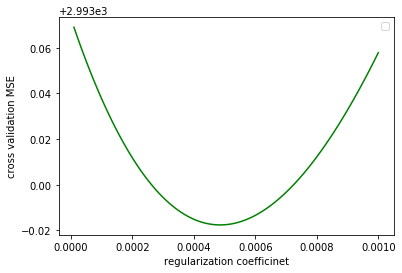

In [0]:
# Regularized Linear Regression with Tikhonov Regularization "Ridge Regression"
X,y = datasets.load_diabetes(return_X_y=True)
regularization_coeffs = np.linspace(0.00001,0.001,100)
print (regularization_coeffs)
mean_cv_score = []
for c in regularization_coeffs:
  ridge = Ridge(alpha=c)
  ridge.fit(X,y)
  scores = cross_val_score(ridge, X, y, cv=5,scoring='neg_mean_squared_error') # cv is number of cross validation folds
  print(-scores)
  # Get mean score and confidence 
  print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))
  mean_cv_score.append(-scores.mean())
print("regularization coefficient with minimum error is : ",regularization_coeffs[mean_cv_score.index(min(mean_cv_score))])  
plt.ylabel("cross validation MSE")
plt.xlabel("regularization coefficinet")
plt.plot(regularization_coeffs,mean_cv_score,color= "green")
plt.legend()
plt.show()

[1.0e-05 2.0e-05 3.0e-05 4.0e-05 5.0e-05 6.0e-05 7.0e-05 8.0e-05 9.0e-05
 1.0e-04 1.1e-04 1.2e-04 1.3e-04 1.4e-04 1.5e-04 1.6e-04 1.7e-04 1.8e-04
 1.9e-04 2.0e-04 2.1e-04 2.2e-04 2.3e-04 2.4e-04 2.5e-04 2.6e-04 2.7e-04
 2.8e-04 2.9e-04 3.0e-04 3.1e-04 3.2e-04 3.3e-04 3.4e-04 3.5e-04 3.6e-04
 3.7e-04 3.8e-04 3.9e-04 4.0e-04 4.1e-04 4.2e-04 4.3e-04 4.4e-04 4.5e-04
 4.6e-04 4.7e-04 4.8e-04 4.9e-04 5.0e-04 5.1e-04 5.2e-04 5.3e-04 5.4e-04
 5.5e-04 5.6e-04 5.7e-04 5.8e-04 5.9e-04 6.0e-04 6.1e-04 6.2e-04 6.3e-04
 6.4e-04 6.5e-04 6.6e-04 6.7e-04 6.8e-04 6.9e-04 7.0e-04 7.1e-04 7.2e-04
 7.3e-04 7.4e-04 7.5e-04 7.6e-04 7.7e-04 7.8e-04 7.9e-04 8.0e-04 8.1e-04
 8.2e-04 8.3e-04 8.4e-04 8.5e-04 8.6e-04 8.7e-04 8.8e-04 8.9e-04 9.0e-04
 9.1e-04 9.2e-04 9.3e-04 9.4e-04 9.5e-04 9.6e-04 9.7e-04 9.8e-04 9.9e-04
 1.0e-03]
[2779.958012168796]
MSE: 2779.96 (+/- 0.00)
[2779.958012168796, 3028.8737710619016]
MSE: 2904.42 (+/- 248.92)
[2779.958012168796, 3028.8737710619016, 3237.5878451911262]
MSE: 3015.47 (+/-

No handles with labels found to put in legend.



[2783.101496511455, 3031.446475938127, 3228.909606995223]
MSE: 3014.49 (+/- 364.79)
[2783.101496511455, 3031.446475938127, 3228.909606995223, 3006.583517623441]
MSE: 3012.51 (+/- 315.99)
[2783.101496511455, 3031.446475938127, 3228.909606995223, 3006.583517623441, 2915.1221482537726]
MSE: 2993.03 (+/- 293.17)
[2783.1353760911206]
MSE: 2783.14 (+/- 0.00)
[2783.1353760911206, 3031.473195140504]
MSE: 2907.30 (+/- 248.34)
[2783.1353760911206, 3031.473195140504, 3228.8274561816015]
MSE: 3014.48 (+/- 364.70)
[2783.1353760911206, 3031.473195140504, 3228.8274561816015, 3006.5655989038482]
MSE: 3012.50 (+/- 315.91)
[2783.1353760911206, 3031.473195140504, 3228.8274561816015, 3006.5655989038482, 2915.1709251028446]
MSE: 2993.03 (+/- 293.09)
[2783.1693779818265]
MSE: 2783.17 (+/- 0.00)
[2783.1693779818265, 3031.500492531797]
MSE: 2907.33 (+/- 248.33)
[2783.1693779818265, 3031.500492531797, 3228.741439545534]
MSE: 3014.47 (+/- 364.60)
[2783.1693779818265, 3031.500492531797, 3228.741439545534, 3006.

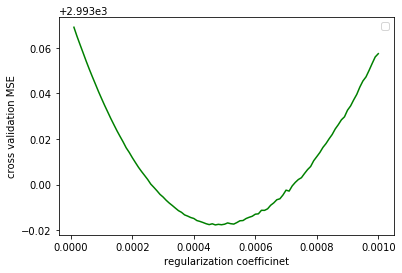

In [0]:
# Closed Form Regularized Linear Regression with Tikhonov Regularization "Ridge Regression"
X,y = datasets.load_diabetes(return_X_y=True)
regularization_coeffs = np.linspace(0.00001,0.001,100)
print (regularization_coeffs)
mean_cv_score = []
for c in regularization_coeffs:
  m,n = X.shape
  b = np.ones((m,1))
  X = np.hstack((X,b))
  kf = KFold(n_splits=5)
  cv_error = []
  for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    w = LA.inv(X_train.T@ X_train + c*np.identity(n+1)) @ X_train.T @ y_train.T
    predicted = np.dot(X_test,w) 
    MSE = np.mean((y_test - predicted)**2)
    cv_error.append(MSE)
    print(cv_error)  
    # Get mean score and confidence 
    print("MSE: %0.2f (+/- %0.2f)" % (np.mean(cv_error), np.std(cv_error) * 2))
  mean_cv_score.append(np.mean(cv_error))
print("regularization coefficient with minimum error is : ",regularization_coeffs[mean_cv_score.index(min(mean_cv_score))])  
plt.ylabel("cross validation MSE")
plt.xlabel("regularization coefficinet")
plt.plot(regularization_coeffs,mean_cv_score,color= "green")
plt.legend()
plt.show()

[0.0001 0.0002 0.0003 0.0004 0.0005 0.0006 0.0007 0.0008 0.0009 0.001
 0.0011 0.0012 0.0013 0.0014 0.0015 0.0016 0.0017 0.0018 0.0019 0.002
 0.0021 0.0022 0.0023 0.0024 0.0025 0.0026 0.0027 0.0028 0.0029 0.003
 0.0031 0.0032 0.0033 0.0034 0.0035 0.0036 0.0037 0.0038 0.0039 0.004
 0.0041 0.0042 0.0043 0.0044 0.0045 0.0046 0.0047 0.0048 0.0049 0.005
 0.0051 0.0052 0.0053 0.0054 0.0055 0.0056 0.0057 0.0058 0.0059 0.006
 0.0061 0.0062 0.0063 0.0064 0.0065 0.0066 0.0067 0.0068 0.0069 0.007
 0.0071 0.0072 0.0073 0.0074 0.0075 0.0076 0.0077 0.0078 0.0079 0.008
 0.0081 0.0082 0.0083 0.0084 0.0085 0.0086 0.0087 0.0088 0.0089 0.009
 0.0091 0.0092 0.0093 0.0094 0.0095 0.0096 0.0097 0.0098 0.0099 0.01  ]
[2780.21270903 3028.94361968 3237.11432902 3008.37044187 2910.66452606]
MSE: 2993.06 (+/- 300.90)
[2780.50770154 3029.04758687 3236.53058462 3008.05606896 2911.12681751]
MSE: 2993.05 (+/- 300.25)
[2780.80711657 3029.15524017 3235.9500322  3007.74829417 2911.59373425]
MSE: 2993.05 (+/- 299.60)
[278

No handles with labels found to put in legend.


[2795.12126223 3037.98695753 3204.43066248 3011.08777069 2943.6396497 ]
MSE: 2998.45 (+/- 266.08)
[2795.38064704 3038.16943722 3204.09561202 3011.24843128 2944.11723578]
MSE: 2998.60 (+/- 265.66)
[2795.64183534 3038.35322534 3203.76198347 3011.41266415 2944.59061514]
MSE: 2998.75 (+/- 265.25)
[2795.90843807 3038.53835938 3203.42977841 3011.58119963 2944.8644444 ]
MSE: 2998.86 (+/- 264.86)
[2796.17322965 3038.72478759 3203.09900348 3011.75067827 2944.86907102]
MSE: 2998.92 (+/- 264.52)
[2796.43981105 3038.9124535  3202.76965239 3011.92430085 2944.87380318]
MSE: 2998.98 (+/- 264.19)
[2796.70817793 3039.10505728 3202.44172577 3012.10025418 2944.87864089]
MSE: 2999.05 (+/- 263.85)
[2796.98202588 3039.29481567 3202.11522421 3012.27831721 2944.88358414]
MSE: 2999.11 (+/- 263.51)
[2797.25395121 3039.4855759  3201.79014834 3012.46000561 2944.88863294]
MSE: 2999.18 (+/- 263.17)
[2797.5276462  3039.67704301 3201.46649878 3012.64501425 2944.89451295]
MSE: 2999.24 (+/- 262.83)
[2797.80686716 3039.

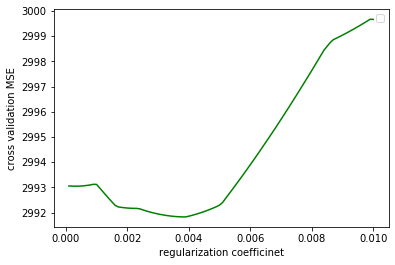

In [0]:
# Regularized Linear Regression with Lasso Regularization 
X,y = datasets.load_diabetes(return_X_y=True)
regularization_coeffs = np.linspace(0.0001,0.01,100)
print (regularization_coeffs)
mean_cv_score = []
for c in regularization_coeffs:
  lasso = Lasso(alpha=c)
  lasso.fit(X,y)
  scores = cross_val_score(lasso, X, y, cv=5,scoring='neg_mean_squared_error') # cv is number of cross validation folds
  print(-scores)
  # Get mean score and confidence 
  print("MSE: %0.2f (+/- %0.2f)" % (-scores.mean(), scores.std() * 2))
  mean_cv_score.append(-scores.mean())
print("regularization coefficient with minimum error is : ",regularization_coeffs[mean_cv_score.index(min(mean_cv_score))])  
plt.ylabel("cross validation MSE")
plt.xlabel("regularization coefficinet")
plt.plot(regularization_coeffs,mean_cv_score,color= "green")
plt.legend()
plt.show()